# **Exercises for Lecture 1**

### 109301060 貿四乙 李叡

### 1. Generate a sequence (0,1,...,30) with function range and assign it to a list x

a. Extract (0,1,...,10) from x with the slicing operator.

In [72]:
x = range(0,31)
x = list(x)
# a. Extract 0,1,2,..,10
x[0:11]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


b. Extract (21,22,...,30) from x with the slicing operator.

In [73]:
x[-10:]

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

c. Extract (10,12,...,24) from x with the slicing operator.

In [74]:
x[10:25:2]

[10, 12, 14, 16, 18, 20, 22, 24]

d. Extract (21,23,...,29) from x with the slicing operator.

In [75]:
x[-10:-1:2]

[21, 23, 25, 27, 29]

e. Use list comprehension to assign (31,32,...,40) in a list y.

In [76]:
y = [i+31 for i in range(10)]
print(y)

[31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


f. With list y, make x be a list of numbers (0,1,...,40)

In [77]:
x.extend(y)

g. Remove the number 33 from x with method remove.

In [78]:
x.remove(33)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40]


h. Delete numbers (31,32,...,40) in x with function del.

In [79]:
del x[31:]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


### 2. Create a dictionary looks like:

a. Extract Team and Points from the dictionary and print them.

In [80]:
var1 = ['Nuggets', 'Heat']
var2 = [94, 89]
var3 = ['Win', 'Lose']

Point_Board = {'Team': var1, 'Points': var2, 'Result': var3} 

# a. Extract Team and Points
print(Point_Board['Team'])
print(Point_Board['Points'])

['Nuggets', 'Heat']
[94, 89]


b. Extract the first element in Team from the dictionary and print it.

In [81]:
print(Point_Board['Team'][0])

Nuggets


c. Extract the second element in Points from the dictionary and print it.

In [82]:
print(Point_Board['Points'][1])

89


d. Change Points to (108,111) and Result to (Lose, Win) and print the changed
dictionary.

In [83]:
Point_Board['Points'] = [108, 111]
Point_Board['Result'] = ['Lose', 'Win']
print(Point_Board['Points'],Point_Board['Result'])

[108, 111] ['Lose', 'Win']


### 3. Import two data files: SP500m.csv and NASDAQm.csv with pandas function read csv.

a. Transfer dates in column Date to ISO-8601 format with method to datetime.


In [84]:
import pandas as pd 
import numpy as np

df1 = pd.read_csv('NASDAQm.csv')
df2 = pd.read_csv('SP500m.csv')

# a. Transfer date
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

b. With adjusted close prices (data in column Adj Close), calculate monthly
log returns: $log (Pt)$ −$log (Pt−1)$, where $P_t$ and $P_{t−1}$ are adjusted close prices at period t and t −1. Assign the log returns into a new column called logr.
Note that the first element in this new column should be nan.

In [85]:
logr1 = np.diff(np.log(df1['Adj Close']))
logr2 = np.diff(np.log(df2['Adj Close']))

df1['logr'] = np.append(np.nan, logr1)
df2['logr'] = np.append(np.nan, logr2)

c. With adjusted close prices, calculate monthly simple returns: ($P_t$−$P_{t−1}$)/$P_{t−1}$.
Assign the simple returns into a new column called sr. Note that the first
element in this new column should be nan.

In [86]:
sr1 = np.diff(df1['Adj Close'])/df1['Adj Close'][:-1]
sr2 = np.diff(df2['Adj Close'])/df2['Adj Close'][:-1]

df1['sr'] = np.append(np.nan, sr1)
df2['sr'] = np.append(np.nan, sr2)

d. Use method describe to calculate summary statistics of the data and assign
the results of the summary statistics into result1 and result2.

In [87]:
pd.set_option('display.expand_frame_repr', False) 
result1 = df1.describe()
result2 = df2.describe()

e. Use functions skew and kurtosis in scipy to calculate skewness and kur-
tosis of the data. Before you calculate, you need to drop the column Date.
Then you need to use method apply. Also nan should be omitted in the
calculations.

In [88]:
import scipy.stats as stats

skew1 = df1.drop(columns = 'Date').apply(stats.skew, axis = 0, nan_policy = 'omit')
skew2 = df2.drop(columns = 'Date').apply(stats.skew, axis = 0, nan_policy = 'omit')

# Calculate kurtosis
kurt1 = df1.drop(columns = 'Date').apply(stats.kurtosis, axis = 0, nan_policy = 'omit')
kurt2 = df2.drop(columns = 'Date').apply(stats.kurtosis, axis = 0, nan_policy = 'omit')

f. Combine results of skewness and kurtosis with those in result1 and result2.
To do this, at first you may need to transfer results of skewness and kurtosis
to pandas data frame with a column name. Then use function concat to
combine these results.

In [89]:
skew1 = pd.DataFrame(skew1, columns = ['skew'])    # should have a column name
skew2 = pd.DataFrame(skew2, columns = ['skew'])    # should have a column name
kurt1 = pd.DataFrame(kurt1, columns = ['kurt'])    # should have a column name
kurt2 = pd.DataFrame(kurt2, columns = ['kurt'])    # should have a column name

result1 = pd.concat([result1, skew1.transpose(), kurt1.transpose()])                                                      
result2 = pd.concat([result2, skew2.transpose(), kurt2.transpose()]) 

print(result1)

print(result2)

               Open          High           Low         Close     Adj Close              Volume                 logr                   sr
count         252.0         252.0         252.0         252.0         252.0               252.0                251.0                251.0
mean     3772.97789    3939.42082   3604.115038   3801.156669   3801.156669  42463165238.095238             0.004721             0.006818
std     2330.860445   2453.884215   2259.121269   2393.402148   2393.402148  11602055312.169725             0.065061             0.064005
min      1180.26001    1347.27002    1108.48999   1172.060059   1172.060059       24374040000.0            -0.260088            -0.229016
25%     2110.534973   2191.360047   2023.952515    2110.17749    2110.17749       36351987500.0            -0.021779            -0.021543
50%     2744.590087   2834.964966   2576.925049   2728.939941   2728.939941       40025100000.0             0.012607             0.012687
75%     4855.502319   5055.527588 

g. Output these results with method to csv. The names of the output files are
result1.csv and result2.csv. Note that the output should keep the row
index. Also use the representation of NaN for not available number by setting
na rep = ’NaN’ in the method.

In [90]:
result1.to_csv('result1.csv', na_rep = 'NaN') 
result2.to_csv('result2.csv', na_rep = 'NaN')

h. Print out sample correlation between log and sample returns.

In [91]:
print(df1[['logr','sr']].dropna())
print(df2[['logr','sr']].dropna())

         logr        sr
1    0.175588  0.191947
2   -0.026726 -0.026372
3   -0.169294 -0.155739
4   -0.126795 -0.119086
5    0.153743  0.166191
..        ...       ...
247  0.091552  0.095874
248 -0.053009 -0.051629
249 -0.023183 -0.022916
250  0.111507  0.117962
251  0.054986  0.056526

[251 rows x 2 columns]
         logr        sr
1   -0.020313 -0.020108
2    0.092324  0.096720
3   -0.031280 -0.030796
4   -0.022159 -0.021915
5    0.023652  0.023934
..        ...       ...
247  0.067719  0.070065
248 -0.040018 -0.039228
249 -0.028056 -0.027666
250  0.102146  0.107546
251  0.036449  0.037121

[251 rows x 2 columns]


### 4

a. Plot probability mass function of a binominal distribution with parameter
n = 10 and p = 0.2. Save the plot with method savefig and file name
figure1.png.

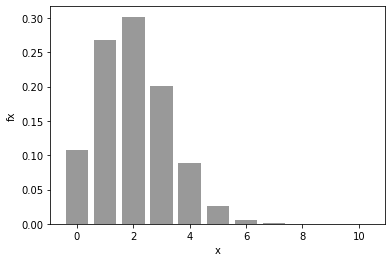

In [92]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# values for x (all between 0 and 10):
x = np.linspace(0, 10, num=11)

# PMF for all these x's:
fx = stats.binom.pmf(x, 10, 0.2)

# plot:
plt.bar(x, fx, color = '0.6')
plt.xlabel('x')
plt.ylabel('fx')
plt.savefig('figure1.png')

b. Plot probability density function of a normal distribution with mean equal to
0.5 and standard deviation equal to 1.2. Save the plot with method savefig
and file name figure2.png.

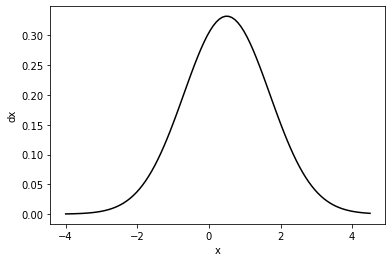

In [93]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Support of normal density, 100 points, from -4 to 4.5 equally spaced
x_range = np.linspace(-4, 4.5, num = 100)

# PDF for all these x's:
pdf = stats.norm.pdf(x_range, loc = 0.5, scale = 1.2)

# plot:
plt.plot(x_range, pdf, linestyle='-', color = 'black')
plt.xlabel('x')
plt.ylabel('dx')
plt.savefig('figure2.png')

### 5. Conduct a simulation to verify unbiasedness.

a. Use random.seed to initialize the random number generator.

In [94]:
import numpy as np
import scipy.stats as stats

# a. Set the random seed:
np.random.seed(123456)

b. What are mean and variance of a random variable following exponential distribution with parameter λ = 1.2.

**The mean is 0.8333 and variance is 0.6944**

c. Generate 100 random samples from an exponential distribution with parameter λ = 1.2. Calculate sample mean and sample variance.

In [95]:
n = 100

# Draw a sample given the population parameters:
sample1 = stats.expon.rvs(scale = 1/1.2, size = n)

# Calculate the sample average:
print(np.mean(sample1), np.var(sample1, ddof = 1))

0.7900450319206638 0.6398100200190397


d. Repeat question c. again and compare the calculated sample mean and sample variance with those obtained in question c.

In [96]:
sample2 = stats.expon.rvs(scale = 1/1.2, size = n)
print(np.mean(sample2), np.var(sample2, ddof = 1))

0.8964328358728296 0.7643199913116412


e. Repeat question c. 10,000 times and collect the sample mean and sample
variance estimates.

In [97]:
r = 10000
lambda_mean = np.empty(r)       ## for storing estimate of mean
lambda_var = np.empty(r)        ## for storing estimate of variance

# Repeat 10,000 times:
for j in range(r):
    sample = stats.expon.rvs(scale = 1/1.2, size = n)
    lambda_mean[j] = np.mean(sample)
    lambda_var[j] = np.var(sample, ddof = 1)

f. Calculate sample means of the 10,000 sample mean and sample variance estimates and compare them to values of the population mean and variance.

In [98]:
print(np.mean(lambda_mean))
print(np.mean(lambda_var))

0.833091862340538
0.6917059967509185
